In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [4]:

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
data = pd.read_csv('./Data/datavf.csv')

x=data.iloc[:, :-2]
y = data.account_type.values.tolist()

Accuracy: 0.6622727272727272

Training Accuracy score: 0.68125
Testing Accuracy score: 0.6622727272727272
classification_report 
               precision    recall  f1-score   support

           0       0.60      0.94      0.73      2158
           1       0.87      0.40      0.55      2242

    accuracy                           0.66      4400
   macro avg       0.73      0.67      0.64      4400
weighted avg       0.74      0.66      0.64      4400



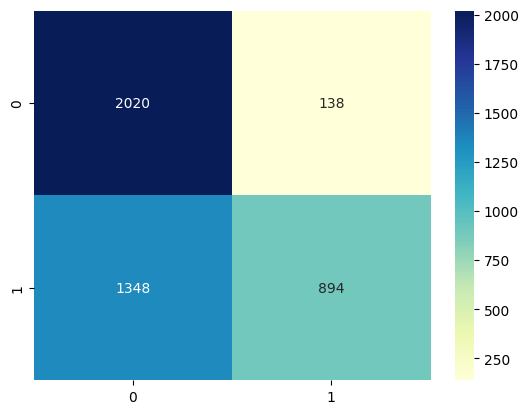

In [6]:
from sklearn.neural_network import MLPClassifier



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)

# Build the model
mlp = MLPClassifier(activation='relu', solver='adam', max_iter=1000 )

# Train the model
mlp.fit(X_train, y_train)

# Evaluate the model
accuracy = mlp.score(X_test, y_test)
print('Accuracy:', accuracy)
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm)
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

result

with StandardScaler et dimensionality reduction techniques.

Accuracy: 87.22%

Training Accuracy score: 0.8868531143476913
Testing Accuracy score: 0.8721722962503874
DecisionTreeClassifier score: 0.8868531143476913
classification_report 
               precision    recall  f1-score   support

           0       0.84      0.79      0.82      2309
           1       0.89      0.92      0.90      4145

    accuracy                           0.87      6454
   macro avg       0.86      0.85      0.86      6454
weighted avg       0.87      0.87      0.87      6454



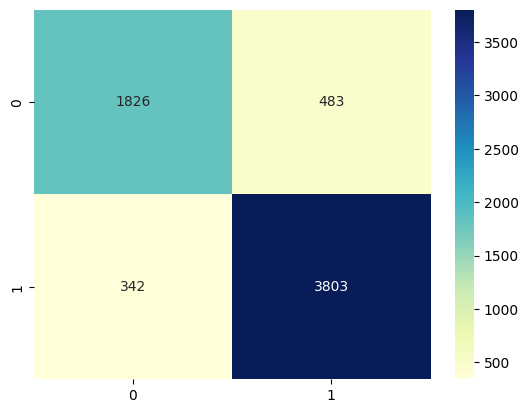

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/data+descvf.csv')
tl = TomekLinks()
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
x, y = tl.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf', MLPClassifier(activation='relu', solver='adam', max_iter=1000 ))
])

pipeline.fit(x_train, y_train)

score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)

print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("DecisionTreeClassifier score:",pipeline.score(x_train, y_train))
print("classification_report \n "+classification_report(y_test, y_pred_test))

from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm)
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()